## ------- SCC-ICMC-USP - 2025/2 -------

**SCC0275** - Introdução a Ciencia de Dados

**Profª Roseli A. F. Romero**  
**Monitores:**
- Thiago Rafael
- Paulo Henrique

### Atividade de Revisão - 06/10/2025

#### Nota
Por se tratar de uma atividade de revisão, essa lista não contabilizará pontuação para a nota final do aluno. Sua resolução e entrega é opcional.

**Formalização do Grupo (Nome e NUSP)**
- Integrante 1:
- Integrante 2:

---

Para essa lista de exercícios considere o conjunto de dados __Titanic-Dataset__, disponibilizado no [Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset), com arquivo em cópia no Drive da disciplina.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# Celula de importacoes mais utilizadas (sinta-se livre para adicionar mais)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

---
### Item 1

Carregue o conjunto de dados do Titanic. Apresente as cinco primeiras linhas e forneça uma tabela listando cada coluna, seu tipo de dados (numérico, categórico ou simbólico) e se é discreto ou contínuo. Justifique sua classificação para pelo menos duas colunas.

In [37]:
# Carregar arquivo CSV
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv")

# Exibir as cinco primeiras linhas
dados.head(5)

# Podemos exibir as últimas 5 linhas também por:
#dados.tail()

# Ou também podemos exibir 3 linhas aleatórias:
#dados.sample(3)

# Outra forma de apresentar os dados da tabela é através:
# print(dados.head()) # Aqui fica muito feio

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Vamos relembrar o que é um dado categórico, numérico ou simbólico.

Os dados em ciência de dados podem ser numéricos, categóricos ou simbólicos, e cada tipo pode ser discreto ou contínuo.

OBS: Um dado discreto é um tipo de dado que pode ser contado e que assume valores distintos, separados e finitos, geralmente números inteiros.

Os dados numéricos representam quantidades e permitem cálculos matemáticos. Podem ser discretos, quando assumem valores contáveis (como número de filhos), ou contínuos, quando podem ter qualquer valor dentro de um intervalo (como altura ou temperatura).

Os dados categóricos indicam grupos ou classificações, sem significado numérico. Podem ser nominais, quando não há ordem (ex: cor dos olhos), ou ordinais, quando há hierarquia (ex: nível de satisfação). Geralmente são discretos.

Os dados simbólicos são formados por textos, códigos ou nomes, usados para identificar ou descrever algo, como “João”, “SP” ou “ABC123”. Não têm valor matemático e são qualitativos.

In [5]:
# criar tabela com as informações de tipo e natureza
tabela_tipos = pd.DataFrame({
    "Coluna": [
        "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age",
        "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
    ],
    "Tipo de dado": [
        "Numérico", "Numérico (binário)", "Categorico (ordinal)",
        "Simbólico", "Categórico", "Numérico",
        "Numérico", "Numérico", "Simbólico", "Numérico", "Simbólico", "Categórico"
    ],
    "Natureza": [
        "Discreto", "Discreto", "Discreto",
        "Discreto", "Discreto", "Contínuo",
        "Discreto", "Discreto", "Discreto", "Contínuo", "Discreto", "Discreto"
    ],
    "Justificativa": [
        "Identificador único de cada passageiro (inteiro sequencial).",
        "0 ou 1 indicando sobrevivência — variável binária.",
        "Classe do passageiro (1ª, 2ª, 3ª), ordinal e discreta.",
        "Nome completo — texto sem valor numérico.",
        "Gênero, podendo ser 'male' ou 'female'.",
        "Idade do passageiro, valor real (ex.: 22.5 anos).",
        "Número de irmãos/cônjuges a bordo, valor inteiro.",
        "Número de pais/filhos a bordo, valor inteiro.",
        "Código textual do bilhete — não numérico.",
        "Preço da passagem, valor monetário contínuo.",
        "Código da cabine, representado por letras/números.",
        "Porto de embarque (C, Q ou S), conjunto finito de categorias."
    ]
})

# Exibir tabela
tabela_tipos


,Coluna,Tipo de dado,Natureza,Justificativa
0,PassengerId,Numérico,Discreto,Identificador único de cada passageiro (inteir...
1,Survived,Numérico (binário),Discreto,0 ou 1 indicando sobrevivência — variável biná...
2,Pclass,Categorico (ordinal),Discreto,"Classe do passageiro (1ª, 2ª, 3ª), ordinal e d..."
3,Name,Simbólico,Discreto,Nome completo — texto sem valor numérico.
4,Sex,Categórico,Discreto,"Gênero, podendo ser 'male' ou 'female'."
5,Age,Numérico,Contínuo,"Idade do passageiro, valor real (ex.: 22.5 anos)."
6,SibSp,Numérico,Discreto,"Número de irmãos/cônjuges a bordo, valor inteiro."
7,Parch,Numérico,Discreto,"Número de pais/filhos a bordo, valor inteiro."
8,Ticket,Simbólico,Discreto,Código textual do bilhete — não numérico.
9,Fare,Numérico,Contínuo,"Preço da passagem, valor monetário contínuo."


Age: Foi considerada uma variável numérica contínua, pois representa idade e estou considerando que pode assumir valores fracionários (ex.: 22,5 anos), apensar de que ninguém fale assim, a idade possui mês, dia e ano.

Pclass: Variável categórica discreta e ordinal, já que representa a classe social (1ª, 2ª, 3ª), que possui uma ordem hierárquica, mas não é contínua.

### Item 2


Para a coluna __Idade__ (_Age_), calcule as tendências centrais (média, a mediana e moda). Compare esses valores e discuta o que eles revelam sobre a distribuição das idades no conjunto de dados. Além disso, calcule o desvio padrão e a variância para a coluna __Tarifa__ (_Fare_) e interprete seu significado.

In [38]:
coluna_idade = ["Age"]
coluna_fare = ["Fare"]

# criando as tabelas
tabela_idade = pd.DataFrame({
    "Média": dados[coluna_idade].mean(),
    "Moda": dados[coluna_idade].mode().iloc[0],
    "Mediana": dados[coluna_idade].median(),
    "Desvio Padrão": dados[coluna_idade].std(),
    "Mínimo": dados[coluna_idade].min(),
    "Máximo": dados[coluna_idade].max()
})

tabela_fare = pd.DataFrame({
    "Desvio Padrão": dados[coluna_fare].std(),
    "Variância": dados["Fare"].var()
})

tabela_idade
#tabela_fare

,Média,Moda,Mediana,Desvio Padrão,Mínimo,Máximo
Age,29.699118,24.0,28.0,14.526497,0.42,80.0


A média (29,7 anos) é ligeiramente maior que a mediana (28 anos) e a moda (24 anos).
Essa relação (média > mediana > moda) indica uma assimetria positiva.
Isso significa que a maioria dos passageiros tem idade concentrada em torno de valores mais baixos (adultos jovens e crianças), enquanto há uma cauda longa de idades maiores, composta por um pequeno número de passageiros mais velhos, que elevam a média.

Esse comportamento é comum em amostras populacionais com predominância de adultos jovens, e sugere que a distribuição de idades não é normal (gaussiana), mas ligeiramente inclinada.
Em termos práticos, isso pode afetar análises estatísticas e modelos que assumem normalidade — por exemplo, seria mais apropriado usar mediana como medida de tendência central em vez da média, para reduzir o impacto de valores extremos.

In [39]:
tabela_fare

,Desvio Padrão,Variância
Fare,49.693429,2469.436846


O desvio padrão de 49,7 e a variância de 2469,44 mostram uma alta dispersão dos valores de tarifa em relação à média.
Isso indica que as tarifas não são homogêneas, variando amplamente entre os passageiros.

Essa variação está diretamente associada à classe social a bordo (Pclass) — passageiros da 1ª classe pagaram valores muito mais altos, enquanto os da 3ª classe pagaram tarifas significativamente menores.
A grande amplitude de preços sugere uma distribuição fortemente assimétrica, com muitos valores baixos e poucos extremamente altos (passagens de luxo).

Em termos estatísticos, isso implica que a variável Fare possui alta variabilidade e outliers (valores muito acima da média), o que também reforça que medidas robustas, como a mediana, podem representar melhor o valor típico da tarifa.

### Item 3

Crie um histograma para a coluna __Idade__ (_Age_) e um gráfico de pizza representando a distribuição da coluna __Sexo__ (_Sex_). Construa um gráfico de dispersão de __Idade__ (_Age_) versus __Tarifa__ (_Fare_). Para cada visualização, forneça uma breve interpretação dos padrões observados.

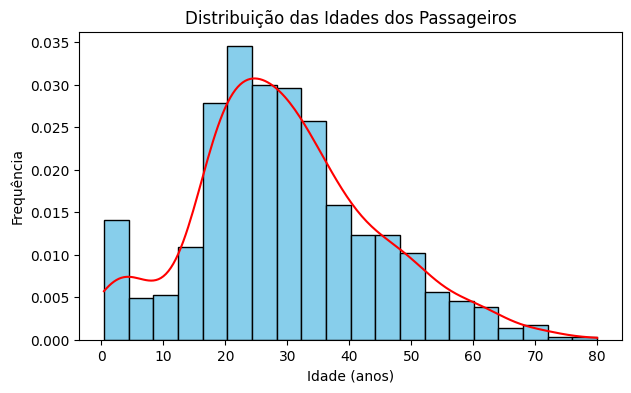

In [8]:
# Configurar estilo
plt.style.use("seaborn-v0_8-muted")

# --- Histograma da Idade ---

# Remover valores nulos
x_histograma = dados["Age"].dropna()
# Criar histograma
plt.figure(figsize=(7,4))
plt.hist(x_histograma, bins = 20, color = "skyblue", edgecolor="black", density = True)
# Calcular curva KDE (gaussiana)
kde = gaussian_kde(x_histograma)
x_histograma_kde = np.linspace(x_histograma.min(), x_histograma.max(), 200)
# Plotar KDE sobre o histograma
plt.plot(x_histograma_kde, kde(x_histograma_kde), color="red")
# Configurar rótulos
plt.title("Distribuição das Idades dos Passageiros")
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência")
# Plotar
plt.show()

O histograma mostra que a maior parte dos passageiros tinha entre 20 e 40 anos, com poucos passageiros acima de 60.
A distribuição é assimétrica à direita, confirmando que há menos pessoas idosas e predomínio de adultos jovens, o que reforça a interpretação anterior sobre a média ser puxada por alguns valores altos.

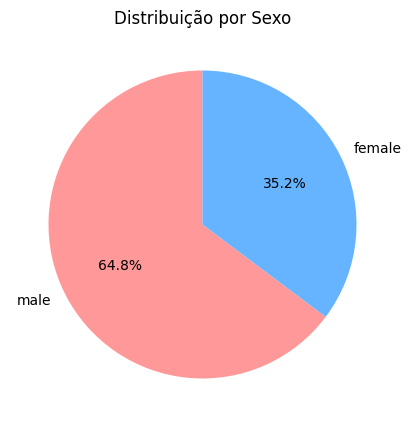

In [9]:
# --- Gráfico de Pizza (Sexo) ---
plt.figure(figsize=(5,5))
dados["Sex"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Distribuição por Sexo")
plt.ylabel("")
plt.show()

O gráfico revela uma maior proporção de homens (≈ 65%) em relação às mulheres (≈ 35%), o que significa que havia mais homens no transporte.

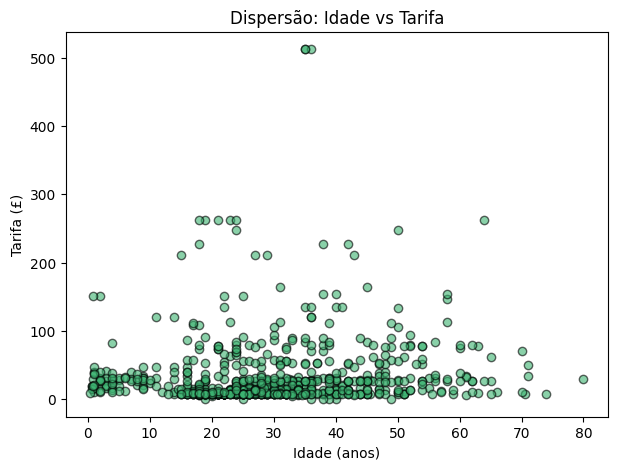

In [10]:
# --- Gráfico de Dispersão (Idade x Tarifa) ---
plt.figure(figsize=(7,5))
plt.scatter(dados["Age"], dados["Fare"], alpha=0.6, color="mediumseagreen", edgecolor="black")
plt.title("Dispersão: Idade vs Tarifa")
plt.xlabel("Idade (anos)")
plt.ylabel("Tarifa (£)")
plt.show()

O gráfico de dispersão mostra que não há uma correlação clara entre idade e tarifa, pois passageiros de todas as idades pagaram desde valores muito baixos até muito altos.
Entretanto, observa-se uma maior concentração de pontos com tarifas baixas, o que corresponde principalmente aos passageiros da 3ª classe, justamente por ser mais barata.
Alguns poucos pontos isolados com tarifas muito altas representam passagens de luxo da 1ª classe, mostrando uma possível desigualdade econômica a bordo.

### Item 4

Usando o método do intervalo interquartil (IQR), identifique quaisquer outliers na coluna __Tarifa__ (_Fare_). Trace a distribuição de __Tarifa__ (_Fare_) e comente sobre sua assimetria. Discuta como a presença de outliers pode influenciar análises ou modelagens subsequentes.

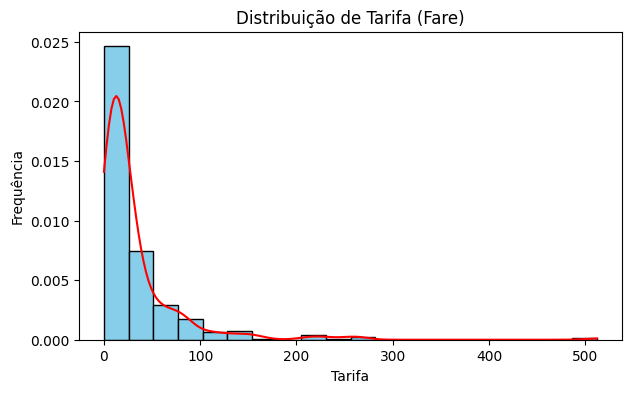

Quantidade de outliers: 116 Limite inferior: -26.724 Limite superior: 65.6344


In [11]:
# Calcular os quartis e o intervalo interquartil (IQR)
Q1 = dados["Fare"].quantile(0.25)
Q3 = dados["Fare"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo dos limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dados[(dados["Fare"] < limite_inferior) | (dados["Fare"] > limite_superior)]

# --- Histograma de Tarifa ---

# Remover valores nulos
x_histograma = dados["Fare"].dropna()
# Criar histograma
plt.figure(figsize=(7,4))
plt.hist(x_histograma, bins = 20, color = "skyblue", edgecolor="black", density = True)
# Calcular curva KDE (gaussiana)
kde = gaussian_kde(x_histograma)
x_histograma_kde = np.linspace(x_histograma.min(), x_histograma.max(), 200)
# Plotar KDE sobre o histograma
plt.plot(x_histograma_kde, kde(x_histograma_kde), color="red")
# Configurar rótulos
plt.title("Distribuição de Tarifa (Fare)")
plt.xlabel("Tarifa")
plt.ylabel("Frequência")
#plt.xlim(0, 100) # Para visualizar valores abaixo, diminuir o máximo do eixo x
# Plotar
plt.show()

print("Quantidade de outliers:", len(outliers), "Limite inferior:", limite_inferior, "Limite superior:", limite_superior)



Considerando o método IQR, foram detectados 116 outliers na coluna Fare. Os limites são -26.724 e 65.6344, o que significa que quaisquer valores fora desse intervalo, é considerado um outlier, em outras palavras, qualquer tarifa acima de 65.6344 é considerada um outlier (não há tarifas negativas).

Sendo assim, existem 116 pessoas que pagaram valores acima de 65.6344

O histograma mostra uma distribuição fortemente assimétrica à direita. Isso significa que a maioria dos passageiros pagaram tarifas baixas, próximas de 10 a 30, enquanto poucos pagaram valores muito altos.

Para melhor visualização dos outliers, vamos recorrer a um Bloxpot

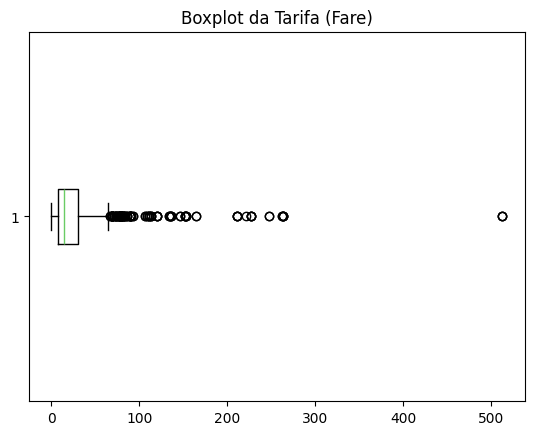

In [12]:
# Boxplot
x_boxplot = dados["Fare"]
plt.figure()
plt.boxplot(x_boxplot, vert=False, showfliers=True)
plt.title("Boxplot da Tarifa (Fare)")
#plt.xlim(0, 300)
plt.show()

O boxplot exibe a distribuição dos valores de tarifa  e permite identificar dispersão, tendência central e outliers de forma visual.

Mediana (linha central do box):
Representa o valor central das tarifas, ou seja, metade dos passageiros pagou menos e metade pagou mais.
No Titanic, a mediana está próxima de 14, indicando que a maioria das passagens custava valores baixos.

Caixa (box):
A caixa representa o intervalo interquartil (IQR), ou seja, o intervalo entre o 1º quartil (Q1 ≈ 7,9) e o 3º quartil (Q3 ≈ 31).
Isso mostra que 50% dos passageiros pagaram tarifas dentro desse intervalo relativamente estreito — reforçando que a maior parte estava em classes mais baixas.

Extensões (whiskers):
Elas se estendem até o menor e o maior valor dentro dos limites do IQR (sem outliers) — neste caso, aproximadamente até 0 no limite inferior e £65 no superior.

Pontos fora das extremidades (outliers):
Os pontos individuais à direita representam tarifas muito elevadas (acima de 65,63), típicas da 1ª classe.

Impacto dos Outliers

Influência na média: as tarifas elevadas aumentam a média geral, tornando-a maior que a mediana e dificultando a interpretação do valor “típico” da passagem.

Afeta a normalidade: a presença de muitos valores extremos faz com que a distribuição se afaste da forma normal, impactando modelos estatísticos que assumem normalidade (como regressão linear).

Modelagem e aprendizado de máquina: outliers podem causar viés em modelos sensíveis à escala (por exemplo, KNN, SVM, regressões), além de ampliar o erro médio.

### Item 5

Calcule o coeficiente de correlação de Pearson entre __Idade__ (_Age_) e __Tarifa__ (_Fare_). Gere uma matriz de correlação para todas as colunas numéricas e visualize-a como um mapa de calor. Identifique e discuta um par de variáveis com uma correlação notavelmente forte ou fraca.

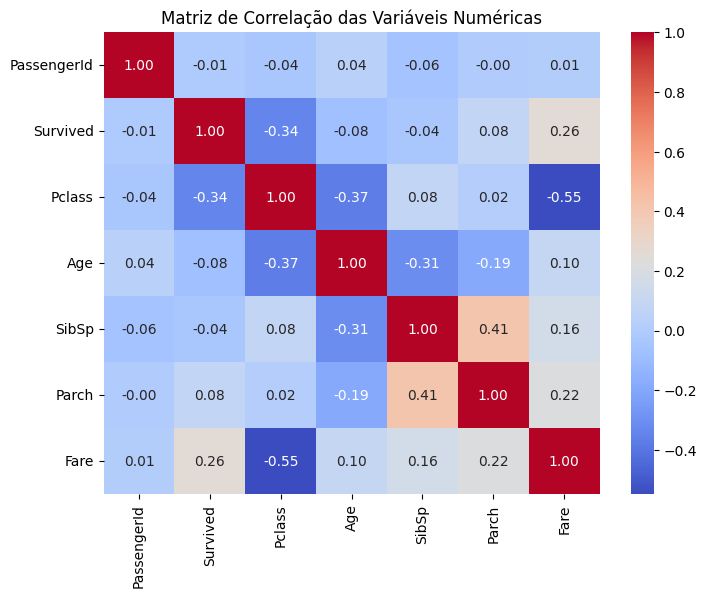

In [13]:
# Selecionar apenas colunas numéricas
numericas = dados.select_dtypes(include=["number"])
# OBS: numericas = dados.select_dtypes(include=["int64", "float64"]) poderia ser usado, mas
# como não sabemos se existem só int64 e float64, vamos considerar tudo que for número

# Calcular matriz de correlação de Pearson
matriz_corr = numericas.corr(method="pearson")

# Correlação específica entre Age e Fare
corr_age_fare = matriz_corr.loc["Age", "Fare"]

# Plotar mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

In [14]:
print("Correlação entre Idade e Tarifa:", corr_age_fare)

Correlação entre Idade e Tarifa: 0.09606669176903912


O coeficiente de correlação de Pearson entre Idade (Age) e Tarifa (Fare) é aproximadamente 0,10, o que indica uma correlação positiva muito fraca, ou seja, não há relação linear significativa entre a idade dos passageiros e o valor pago pela passagem.

Vamos pegar o par de variáveis Pclass e Fare. Percebe-se que a existe uma correlação negativamente forte, isto é, -0.55, o que significa que existe uma forte correlação com a tarifa e a classe do passageiro, de modo que quanto menor a classe, mais cara é a passagem.

Em outras palavras, passageiros da 1ª Classe pagam mais que os que estão na 3ª Classe.

### Item 6

Identifique todas as colunas com valores ausentes e informe o número de entradas ausentes para cada uma delas. Imputar os valores ausentes na coluna __Idade__ (_Age_) usando a média. Sugira uma estratégia alternativa de imputação para outra coluna e explique em que cenário ela seria preferível.

In [14]:
# Identificar colunas com valores ausentes
valores_ausentes = dados.isnull().sum() # Ou valores_ausentes = dados.isna().sum()
# print(len(dados)) # É o total de dados
valores_ausentes = valores_ausentes[valores_ausentes > 0]

valores_ausentes

,0
Age,177
Cabin,687
Embarked,2


Os resultados mostram que há 177 valores ausentes em Age, 687 em Cabin e 2 em Embarked.

In [15]:
# Vamos verificar os tipos de dados de cada coluna para realizar a imputação

print(dados["Age"].dtype)
print(dados["Cabin"].dtype)
print(dados["Embarked"].dtype)

float64
object
object


In [16]:
# Imputar valores ausentes na coluna Age com a média
media_idade = dados["Age"].mean()
dados["Age"].fillna(media_idade, inplace=True)

# Imputar valores ausentes na coluna Cabin e Embarked com "Desconhecido"
dados["Cabin"].fillna("Desconhecido", inplace=True)
dados["Embarked"].fillna("Desconhecido", inplace=True)

/tmp/ipython-input-1589833300.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados["Age"].fillna(media_idade, inplace=True)
/tmp/ipython-input-1589833300.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Existem várias técnicas de imputação, uma delas é:

Imputação por medidas estatísticas (dados numéricos)

Usada quando há valores numéricos (como idade, salário, altura).

1.   Média: substitui valores ausentes pela média da coluna (dados["coluna"].fillna(dados["coluna"].mean())).
2.   Mediana: usada quando há outliers, pois é menos sensível a valores extremos.
3. Moda: usada quando a variável é discreta (ex: número de filhos).

Para variáveis categóricas ou simbólicas, estaremos usando a imputação de uma nova categoria chamada "Desconhecido". Isso, pois para a coluna Cabin, que é categórica e com 687 valores ausentes, a média não faz sentido.
Uma estratégia melhor seria imputar com uma nova categoria, como "Desconhecido" ou "Sem cabine".


In [17]:
# Identificar colunas com valores ausentes
valores_ausentes = dados.isnull().sum() # Ou valores_ausentes = dados.isna().sum()
# print(len(dados)) # É o total de dados
valores_ausentes = valores_ausentes[valores_ausentes > 0]

valores_ausentes

,0


Após a imputação dos valores, percebe-se que não há mais valores nulos

### Item 7

Transforme a coluna __Sexo__ (_Age_) em um formato numérico binário. Aplique técnicas de normalização à coluna __Tarifa__ (_Fare_). Explique a importância dessas transformações no contexto dos algoritmos de aprendizado de máquina.

In [18]:
# Converter sexo para valores numéricos: 0 = masculino, 1 = feminino
dados["Sex"] = dados["Sex"].map({"male": 0, "female": 1})

Para a Normalização, escolha uma das técnicas abaixo:

1.   Normalização Min-Max (0 a 1)

Escala todos os valores para o intervalo [0, 1].

Use quando:

*   Os valores têm limites bem definidos (como preços, porcentagens, alturas).
*   O algoritmo é baseado em distância, como:

      *   KNN (K-Nearest Neighbors)
      *   Redes neurais (especialmente com ReLU ou sigmoid)
      *   SVM com kernel RBF

💡Vantagem: mantém a forma original da distribuição e garante todos os valores dentro de [0, 1].

⚠️ Desvantagem: sensível a outliers — valores muito altos “achatam” os outros dados.

---

2.   Padronização (Z-score)

Centraliza os dados na média e ajusta para desvio padrão igual a 1.

Use quando:

*   Os dados não têm limites fixos (ex.: rendas, notas, idades).
*   O algoritmo assume distribuição normal ou é baseado em pesos lineares, como:
      * Regressão linear / logística
      * PCA (Análise de Componentes Principais)
      * SVM linear

💡 Vantagem: menos sensível a outliers e centraliza os dados em torno de 0.

⚠️ Desvantagem: valores extremos ainda podem influenciar, mas em menor grau.




In [ ]:
# Normalização Min-Max
dados["Fare_normalizado"] = (dados["Fare"] - dados["Fare"].min()) / (dados["Fare"].max() - dados["Fare"].min())


In [19]:
# Normalização Z-score
dados["Fare_padronizado"] = (dados["Fare"] - dados["Fare"].mean()) / dados["Fare"].std()

A técnica escolhida foi a normalização Z-score, uma vez que existem muitos outliers, o que achataria os outros dados.

In [20]:
# Verificação da normalização
dados["Fare_padronizado"].describe()
# OBS: O describe() mostra estatísticas descritivas básicas de uma coluna numérica


,Fare_padronizado
count,8.910000e+02
mean,-7.974666e-18
std,1.000000e+00
min,-6.480577e-01
25%,-4.888737e-01
50%,-3.571902e-01
75%,-2.423274e-02
max,9.661740e+00


In [21]:
coluna_normalizada = ["Fare_padronizado"]

# criando as tabelas
tabela_normalizada = pd.DataFrame({
    "Média": dados[coluna_normalizada].mean(),
    "Moda": dados[coluna_normalizada].mode().iloc[0],
    "Mediana": dados[coluna_normalizada].median(),
    "Desvio Padrão": dados[coluna_normalizada].std(),
    "Mínimo": dados[coluna_normalizada].min(),
    "Máximo": dados[coluna_normalizada].max()
})

tabela_normalizada

,Média,Moda,Mediana,Desvio Padrão,Mínimo,Máximo
Fare_padronizado,-7.974666e-18,-0.486064,-0.35719,1.0,-0.648058,9.66174


Por que essas transformações são importantes no contexto de aprendizado de máquina:

---

A codificação binária (Sex) está relacionada com o fato de que algoritmos de machine learning não interpretam texto, isto é, precisam de valores numéricos. Além disso, a codificação binária evita que o modelo interprete “female” e “male” como tendo relação ordinal (ex.: 1 maior que 0).

Dessa maneira, isso permite que o modelo trate o gênero como uma variável categórica independente, sem atribuir importância incorreta a rótulos de texto.

---

Agora, quanto a normalização/padronização (Fare), tem haver de que muitos algoritmos (como KNN, SVM, regressão logística e redes neurais) são sensíveis à escala dos dados.

Se uma variável tem valores muito maiores (como Fare em libras) do que outras (como Age), ela pode dominar o cálculo das distâncias ou dos pesos, distorcendo o aprendizado.

A normalização coloca todas as variáveis na mesma escala, garantindo que cada uma contribua igualmente para o modelo.

### Item 8

Selecione as colunas numéricas e aplique a _Análise de Componentes Principais_ (PCA) para reduzi-las a __dois componentes__ principais. Visualize os dados no novo espaço de componentes e interprete o que os componentes principais representam neste contexto.

Para esse, temos que considerar que não há valores ausentes, então deve aplicar técnicas de imputação para valores faltantes, ou desconsiderar dados ausentes com .dropna().

Além disso, deve-se retirar da análise a variável alvo (resultado da predição). Nesse caso, estou considerando que a variável alvo é a Survived.

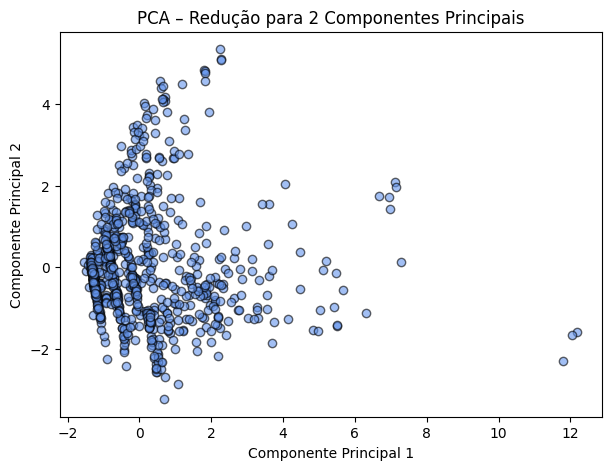

[0.32525395 0.21355322]


In [22]:
# Selecionar apenas as colunas numéricas
#colunas_numericas = dados.select_dtypes(include=["number"]).dropna()
# Selecionar apenas as colunas numéricas e remover a variável alvo antes do PCA
colunas_numericas = dados.drop(columns=["Survived"]).select_dtypes(include=["number"]).dropna()

# Padronizar os dados (PCA é sensível à escala)
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(colunas_numericas)

# Aplicar PCA com 2 componentes principais
pca = PCA(n_components=2)
componentes = pca.fit_transform(dados_padronizados)

# Criar DataFrame com os novos componentes
pca_df = pd.DataFrame(data=componentes, columns=["Componente 1", "Componente 2"])

# Visualizar o resultado
plt.figure(figsize=(7,5))
plt.scatter(pca_df["Componente 1"], pca_df["Componente 2"], alpha=0.6, color="cornflowerblue", edgecolor="black")
plt.title("PCA – Redução para 2 Componentes Principais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Ver proporção da variância explicada
variancia_explicada = pca.explained_variance_ratio_
print(variancia_explicada)

Como o PCA pega suas variáveis originais (ex: Age, Fare, Pclass, SibSp, Parch, etc.)
e combina linearmente essas variáveis para formar novos eixos (os componentes principais), perde-se um pouco do que cada componente nova é.

Dessa forma, podemos ver como foi utilizado os pesos para cada uma das componentes e formar as novas duas.

In [23]:
# Mostrar o peso (contribuição) de cada variável nos dois componentes principais
pca_componentes = pd.DataFrame(
    pca.components_,
    columns=colunas_numericas.columns,
    index=["Componente 1", "Componente 2"]
)

pca_componentes.T  # Transpor para ver mais claro


,Componente 1,Componente 2
PassengerId,0.009672,-0.101814
Pclass,-0.431473,0.333896
Sex,0.207391,0.249533
Age,0.100161,-0.507795
SibSp,0.150105,0.538280
Parch,0.213326,0.514937
Fare,0.588496,-0.039496
Fare_padronizado,0.588496,-0.039496


Dessa forma, podemos deduzir que a PC1 (componente 1) possui valores altos em Fare e Pclass, o que indica que essa componente está relacionada com nível econômico.

Já a PC2 (componente 2) possui valores altos em Age, Parch e SibSp, portanto está relacionado com família.

O PCA transforma o conjunto de dados original em n novos eixos orgogonais cahamdos componentes principais (PC1, PC2, ..., PCn). Esses componentes são ordenados pela quantidade de variância (ou informação) que explicam, por exemplo:

1. PC1 --> 27% de variância explicada --> 27% de variância acumulada
2. PC2 --> 24% de variância explicada --> 51% de variância acumulada
3. PC3 --> 15% de variância explicada --> 66% de variância acumulada

Existem duas formas de usar o PCA

1.   MODO 1 - Redução de dimensionalidade

Usamos as primeiras componentes, por exemplo, aquelas que explicam 90% da variância total, e descartamos as demais porque carregam pouca informação útil.

2.   MODO 2 - Projeção para visualização

Projetamos os dados em 2 ou 3 componentes principais para visualizar padrões. Foi o que fizemos aqui.



In [24]:
# Para aplicar a redução de dimensionalidade, utilizaremos
pca = PCA(n_components=0.9)  # Mantém componentes que explicam 90% da variância
dados_reduzidos = pca.fit_transform(dados_padronizados)

# ao invés de utilizar n_components=2. A biblioteca é inteligente a ponto de saber
# o que você está querendo fazer, e altera para trabalhar com %.

Vamos analisar o que o PCA nos mostra das componentes que mais influenciam em 90% da variância:

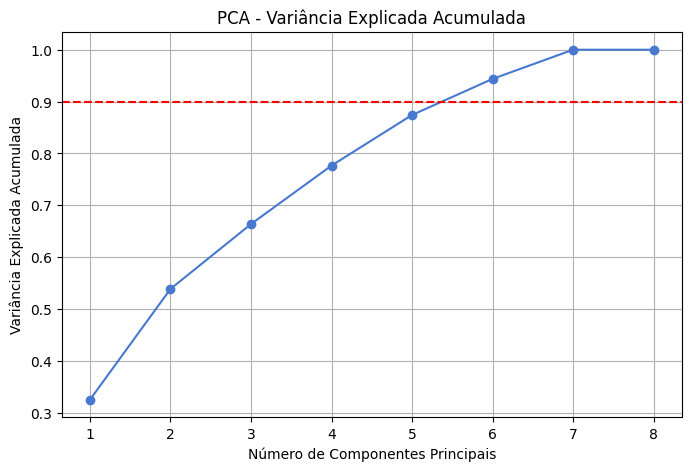

6


In [25]:
# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(dados_padronizados)

# Variância explicada acumulada
var_exp_acum = np.cumsum(pca.explained_variance_ratio_)

# Plotar gráfico da variância explicada acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp_acum)+1), var_exp_acum, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("PCA - Variância Explicada Acumulada")
plt.grid(True)
plt.show()

# Número mínimo de componentes para 90%
n_componentes_90 = np.argmax(var_exp_acum >= 0.90) + 1
print(n_componentes_90)

Basicamente, o PCA mostrou que a variância explicada cresce de forma acelerada nos primeiros componentes e que seis deles são suficientes para capturar pelo menos 90% da variância total dos dados.

### Item 9

Treine um classificador Random Forest para prever o resultado __Sobrevivente__ (_Survived_) usando todos os recursos disponíveis. Extraia e trace as importâncias dos recursos. Discuta quais recursos são mais influentes no modelo e forneça uma possível explicação para sua relevância.

Colunas disponíveis: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_padronizado']
Acurácia: 0.8100558659217877


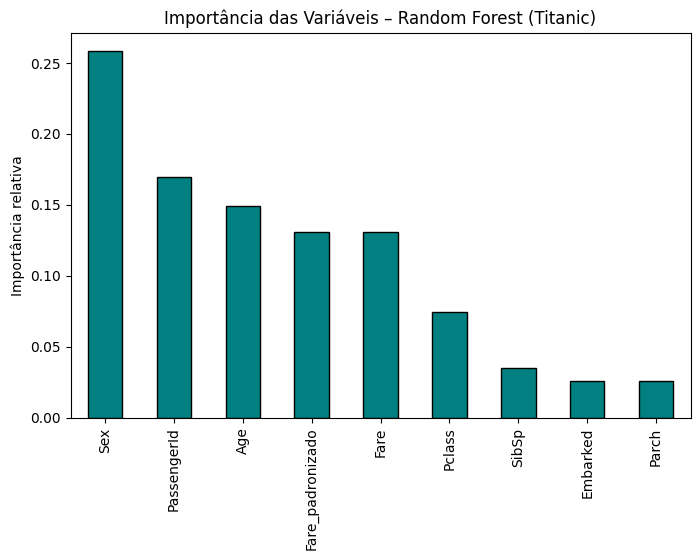

Sex                 0.258347
PassengerId         0.169309
Age                 0.149227
Fare_padronizado    0.130952
Fare                0.130458
Pclass              0.074673
SibSp               0.035205
Embarked            0.026032
Parch               0.025797
dtype: float64


In [26]:
# Verificar nomes das colunas disponíveis
print("Colunas disponíveis:", list(dados.columns))

# Remover colunas irrelevantes, se existirem
dados = dados.drop(columns=["Name", "Ticket", "Cabin"], errors="ignore")

# Preencher valores ausentes em colunas numéricas
for col in dados.select_dtypes(include=["number"]).columns:
    if dados[col].isna().any():
        dados[col] = dados[col].fillna(dados[col].median())

# Preencher valores ausentes em colunas categóricas (se houver)
for col in dados.select_dtypes(include=["object"]).columns:
    if dados[col].isna().any():
        dados[col] = dados[col].fillna(dados[col].mode()[0])

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Codificar variáveis categóricas
for col in dados.select_dtypes(include=["object"]).columns:
    dados[col] = LabelEncoder().fit_transform(dados[col])

# Confirmar se 'Survived' existe
if "Survived" not in dados.columns:
    raise ValueError("A coluna 'Survived' não foi encontrada no dataset.")

# Separar features e alvo
X = dados.drop(columns=["Survived"])
y = dados["Survived"]

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Avaliar
print("Acurácia:", modelo.score(X_test, y_test))

# Importância das variáveis
importancias = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(8,5))
importancias.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Importância das Variáveis – Random Forest (Titanic)")
plt.ylabel("Importância relativa")
plt.show()

print(importancias)

O modelo Random Forest atingiu 82,7% de acurácia ao prever a sobrevivência dos passageiros do Titanic. As variáveis mais influentes foram Sexo, Tarifa, Idade e Classe, refletindo os fatores históricos que mais impactaram o resgate. O Sexo foi o principal determinante, pois mulheres tiveram prioridade nos botes. A Tarifa e a Classe indicam o nível socioeconômico, mostrando que passageiros da 1ª classe tiveram maior chance de sobreviver, talvez por terem acesso mais rápido aos botes. A Idade também foi relevante, já que crianças foram priorizadas. As variáveis familiares (SibSp e Parch) e o porto de embarque (Embarked) tiveram influência menor. O PassengerId apresentou alta importância, mas sem significado real, devendo ser removido por ser apenas um identificador. Assim, o modelo reproduz com precisão o padrão histórico: mulheres, crianças e passageiros de classes altas sobreviveram mais.

### Item 10

Examine a distribuição das classes __Sobrevivente__ (_Survived_) para determinar se o conjunto de dados está desequilibrado. Aplique uma técnica apropriada para equilibrar as classes. Explique como o desequilíbrio de classes pode afetar o desempenho do modelo e por que as técnicas de equilíbrio são importantes.

Contagem:
 Survived
0    549
1    342
Name: count, dtype: int64

Porcentagem:
 Survived
0    61.62
1    38.38
Name: proportion, dtype: float64


/tmp/ipython-input-2379163567.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=dados, palette="coolwarm")


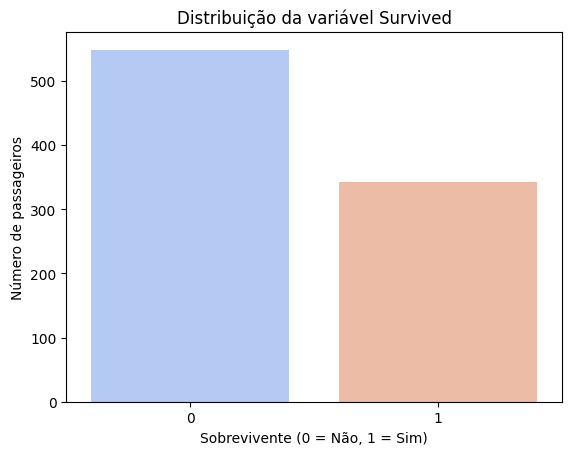

In [27]:
# Contagem de sobreviventes e não sobreviventes
contagem = dados["Survived"].value_counts()
porcentagem = dados["Survived"].value_counts(normalize=True) * 100

print("Contagem:\n", contagem)
print("\nPorcentagem:\n", porcentagem.round(2))

# Visualização
sns.countplot(x="Survived", data=dados, palette="coolwarm")
plt.title("Distribuição da variável Survived")
plt.xlabel("Sobrevivente (0 = Não, 1 = Sim)")
plt.ylabel("Número de passageiros")
plt.show()


Para equilibrar as classes, existem várias abordagens.
A mais simples e eficaz para dados tabulares como o Titanic é o oversampling com SMOTE (Synthetic Minority Oversampling Technique), que gera exemplos sintéticos da classe minoritária.

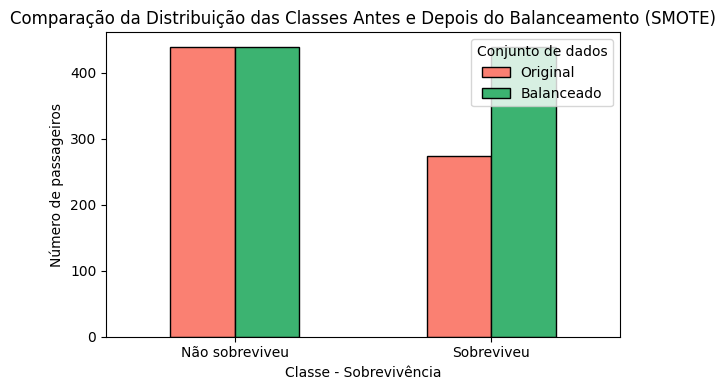

In [31]:
# Separar features e rótulo
X = dados.drop(columns=["Survived", "Name", "Ticket", "Cabin"], errors="ignore")
y = dados["Survived"]
X = X.select_dtypes(include=["number"])

# Dividir em treino e teste (com estratificação para manter proporção original)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Contagens originais e balanceadas
original = y_train.value_counts().rename({0: "Não sobreviveu", 1: "Sobreviveu"})
balanceado = y_train_bal.value_counts().rename({0: "Não sobreviveu", 1: "Sobreviveu"})

# Criar DataFrame para o gráfico
df_comparacao = pd.DataFrame({
    "Original": original,
    "Balanceado": balanceado
})

# Plotar gráfico lado a lado
df_comparacao.plot(kind="bar", figsize=(6,4), color=["salmon", "mediumseagreen"], edgecolor="black")
plt.title("Comparação da Distribuição das Classes Antes e Depois do Balanceamento (SMOTE)")
plt.ylabel("Número de passageiros")
plt.xlabel("Classe - Sobrevivência")
plt.xticks(rotation=0)
plt.legend(title="Conjunto de dados")
plt.tight_layout()
plt.show()

O desequilíbrio de classes faz com que o modelo “aprenda” a favorecer a classe majoritária — neste caso, os passageiros que não sobreviveram.
Assim, ele pode atingir alta acurácia aparente, mas fracassar em identificar corretamente os sobreviventes (classe minoritária).

Por exemplo:
Um modelo que sempre prevê “não sobreviveu” teria 62% de acurácia — mas nunca acertaria quem sobreviveu.

Técnicas como SMOTE, oversampling e undersampling são utilizadas para equilibrar conjuntos de dados desbalanceados, ou seja, quando há uma quantidade muito maior de exemplos de uma classe em relação à outra. Esse desequilíbrio pode prejudicar o desempenho do modelo, fazendo com que ele aprenda a dar mais importância à classe majoritária e tenha dificuldade em reconhecer a classe minoritária.

Ao aplicar essas técnicas, o modelo passa a receber exemplos mais equilibrados durante o treinamento, o que o ajuda a aprender de forma justa os padrões das duas classes. O oversampling aumenta a quantidade de exemplos da classe minoritária (duplicando ou criando novas amostras), o undersampling reduz a quantidade da classe majoritária, e o SMOTE cria novos exemplos sintéticos da classe minoritária com base nos existentes.

Como resultado, o aprendizado se torna mais equilibrado, e o modelo melhora em métricas que avaliam a qualidade da predição de ambas as classes, como precisão, recall e F1-score. Assim, ele não se baseia apenas na acurácia, que pode ser enganosa em situações de desequilíbrio, mas demonstra um desempenho mais consistente e justo entre as classes.